#### LMC AGBS

**Author**: Nicholas Hunt-Walker<br/>
**Date**: 9/3/2015

The sole purpose of this notebook is to use<br/>
AGB stars in the LMC that have passed my <br/>
selection criteria to create a color-mag <br/>
relationship for AGB stars.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from thesiscode.plotting import *

In [2]:
lmc = pd.read_csv("../contaminants/allwise_lmc_cut.dat", "\t")
lmc = lmc[(lmc.glon < 290) & (lmc.glat > -40)]

/Users/Nick/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
def add_colors(df):
    df["coljh"] = df.jmag - df.hmag
    df["coljk"] = df.jmag - df.kmag
    df["colj1"] = df.jmag - df.w1
    df["colj2"] = df.jmag - df.w2
    df["colj3"] = df.jmag - df.w3
    df["colj4"] = df.jmag - df.w4

    df["colhk"] = df.hmag - df.kmag
    df["colh1"] = df.hmag - df.w1
    df["colh2"] = df.hmag - df.w2
    df["colh3"] = df.hmag - df.w3
    df["colh4"] = df.hmag - df.w4

    df["colk1"] = df.kmag - df.w1
    df["colk2"] = df.kmag - df.w2
    df["colk3"] = df.kmag - df.w3
    df["colk4"] = df.kmag - df.w4

    df["col12"] = df.w1 - df.w2
    df["col13"] = df.w1 - df.w3
    df["col14"] = df.w1 - df.w4
    df["col23"] = df.w2 - df.w3
    df["col24"] = df.w2 - df.w4
    df["col34"] = df.w3 - df.w4

    return df

In [14]:
def add_colors_multisurvey(df):
    df["coljh"] = df.wjmag - df.whmag
    df["coljk"] = df.wjmag - df.wkmag
    df["colj1"] = df.wjmag - df.w1
    df["colj2"] = df.wjmag - df.w2
    df["colj3"] = df.wjmag - df.w3
    df["colj4"] = df.wjmag - df.w4

    df["colhk"] = df.whmag - df.wkmag
    df["colh1"] = df.whmag - df.w1
    df["colh2"] = df.whmag - df.w2
    df["colh3"] = df.whmag - df.w3
    df["colh4"] = df.whmag - df.w4

    df["colk1"] = df.wkmag - df.w1
    df["colk2"] = df.wkmag - df.w2
    df["colk3"] = df.wkmag - df.w3
    df["colk4"] = df.wkmag - df.w4

    df["col12"] = df.w1 - df.w2
    df["col13"] = df.w1 - df.w3
    df["col14"] = df.w1 - df.w4
    df["col23"] = df.w2 - df.w3
    df["col24"] = df.w2 - df.w4
    df["col34"] = df.w3 - df.w4

    return df

In [4]:
def photo_cuts(df):
    sat = {"w1":2.0, "w2":1.5, "w3":-3.0, "k":8.5}
    fnt = {"w1":16.83, "w2":15.6, "w3":11.32, "k":15.5}
    snr = 3
    
    cuts = (df.w1 > sat["w1"]) & (df.w2 > sat["w2"]) & (df.w3 > sat["w3"]) & (df.kmag > sat["k"]) & (df.w1 < fnt["w1"]) & (df.w2 < fnt["w2"]) & (df.w3 < fnt["w3"]) & (df.kmag < fnt["k"]) & (df.w1snr > snr) & (df.w2snr > snr) & (df.w3snr > snr) & (df.ccflag.map(lambda flag: flag.startswith("00")))

    return df[cuts]

In [5]:
def agb_cuts(df):
    cuts = (df.coljk > 1.1) & (df.col23 < 2.5) & (df.col23 > -0.1)
    
    return df[cuts]

In [6]:
def remove_ysos(df):
    cuts = (df.col12 < 0.2) | (df.col12 > 0.75*df.col23 - 0.33) | (df.col12 < -1. * df.col23 + 1.5)
    
    return df[cuts]

In [30]:
def multicolor_plot(df, adjust={"left": 0.09, "right":0.87, "top":0.97, "bottom":0.1, "hspace":0.35, "wspace":0.2}, color="k"):
    fig = plt.figure(figsize=(13,4))
    fig.subplots_adjust(left=adjust["left"], right=adjust["right"], top=adjust["top"], bottom=adjust["bottom"], hspace=adjust["hspace"], wspace=adjust["wspace"])
    ax = plt.subplot(131)
    ax.scatter(df.col23, df.coljk, s=1, edgecolor="None", c=color)
    ax.set_xlim(-0.2,2.6)
    ax.set_ylim(1,5)
    ax.set_xlabel("W2-W3")
    ax.set_ylabel("J-$K_s$")
    ax.minorticks_on()

    ax = plt.subplot(132)
    ax.scatter(df.col23, df.col12, s=1, edgecolor="None", c=color)
    ax.set_xlim(-0.2,2.6)
    ax.set_ylim(-0.5,2.5)
    ax.set_xlabel("W2-W3")
    ax.set_ylabel("W1-W2")
    ax.minorticks_on()

    ax = plt.subplot(133)
    ax.scatter(df.col12, df.coljk, s=1, edgecolor="None", c=color)
    ax.set_xlim(-0.5,2.6)
    ax.set_ylim(1,5)
    ax.set_xlabel("W1-W2")
    ax.set_ylabel("J-$K_s$")
    ax.minorticks_on()
    plt.show()

In [43]:
def multi_colormag_plot(df, yax, adjust={"left": 0.09, "right":0.87, "top":0.97, "bottom":0.1, "hspace":0.35, "wspace":0.2}, color="k",
                       ylims=None):
    fig = plt.figure(figsize=(13,13))
    fig.subplots_adjust(left=adjust["left"], right=adjust["right"], top=adjust["top"], bottom=adjust["bottom"], hspace=adjust["hspace"], wspace=adjust["wspace"])
    ax = plt.subplot(331)
    ax.scatter(df.coljh, df[yax], s=1, edgecolor="None", c=color)
    ax.set_xlim(0.7, 3)
    if ylims:
        ax.set_ylim(ylims[0], ylims[1])
    ax.set_xlabel("J-H")
    ax.set_ylabel(yax)
    ax.invert_yaxis()
    ax.minorticks_on()

    ax = plt.subplot(332)
    ax.scatter(df.coljk, df[yax], s=1, edgecolor="None", c=color)
    ax.set_xlim(1.0,5)
    if ylims:
        ax.set_ylim(ylims[0], ylims[1])
    ax.set_xlabel("J-K")
    ax.set_ylabel(yax)
    ax.invert_yaxis()
    ax.minorticks_on()

    ax = plt.subplot(333)
    ax.scatter(df.colhk, df[yax], s=1, edgecolor="None", c=color)
    ax.set_xlim(0,2.6)
    if ylims:
        ax.set_ylim(ylims[0], ylims[1])
    ax.set_xlabel("H-K")
    ax.set_ylabel(yax)
    ax.invert_yaxis()
    ax.minorticks_on()

    ax = plt.subplot(334)
    ax.scatter(df.colk1, df[yax], s=1, edgecolor="None", c=color)
    ax.set_xlim(-0.2,3)
    if ylims:
        ax.set_ylim(ylims[0], ylims[1])
    ax.set_xlabel("K-W1")
    ax.set_ylabel(yax)
    ax.invert_yaxis()
    ax.minorticks_on()

    ax = plt.subplot(335)
    ax.scatter(df.colk2, df[yax], s=1, edgecolor="None", c=color)
    ax.set_xlim(-0.2,3)
    if ylims:
        ax.set_ylim(ylims[0], ylims[1])
    ax.set_xlabel("K-W2")
    ax.set_ylabel(yax)
    ax.invert_yaxis()
    ax.minorticks_on()

    ax = plt.subplot(336)
    ax.scatter(df.colk3, df[yax], s=1, edgecolor="None", c=color)
    ax.set_xlim(-0.2,3)
    if ylims:
        ax.set_ylim(ylims[0], ylims[1])
    ax.set_xlabel("K-W3")
    ax.set_ylabel(yax)
    ax.invert_yaxis()
    ax.minorticks_on()
    
    ax = plt.subplot(337)
    ax.scatter(df.col12, df[yax], s=1, edgecolor="None", c=color)
    ax.set_xlim(-0.5,1.7)
    if ylims:
        ax.set_ylim(ylims[0], ylims[1])
    ax.set_xlabel("W1-W2")
    ax.set_ylabel(yax)
    ax.invert_yaxis()
    ax.minorticks_on()

    ax = plt.subplot(338)
    ax.scatter(df.col13, df[yax], s=1, edgecolor="None", c=color)
    ax.set_xlim(-0.5,2.7)
    if ylims:
        ax.set_ylim(ylims[0], ylims[1])
    ax.set_xlabel("W1-W3")
    ax.set_ylabel(yax)
    ax.invert_yaxis()
    ax.minorticks_on()

    ax = plt.subplot(339)
    ax.scatter(df.col23, df[yax], s=1, edgecolor="None", c=color)
    ax.set_xlim(0,2.6)
    if ylims:
        ax.set_ylim(ylims[0], ylims[1])
    ax.set_xlabel("W2-W3")
    ax.set_ylabel(yax)
    ax.invert_yaxis()
    ax.minorticks_on()
    plt.show()

In [7]:
lmc = remove_ysos(agb_cuts(photo_cuts(add_colors(lmc))))

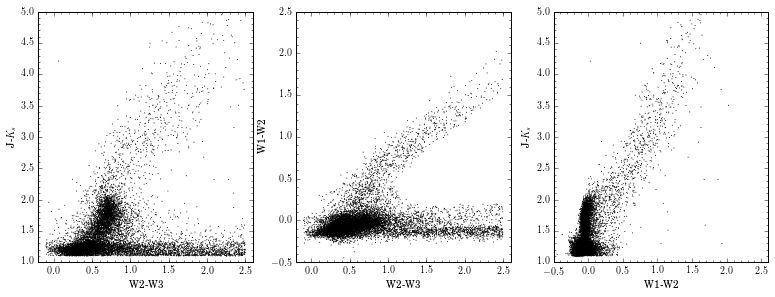

In [24]:
multicolor_plot(lmc)

In [15]:
ogle_wise = pd.read_csv("../samples/ogle_2mass_allwise_alldata.dat", sep=",")
ogle_wise = ogle_wise[ogle_wise.wglon < 290] 
ogle_wise = remove_ysos(agb_cuts(photo_cuts(add_colors_multisurvey(ogle_wise))))

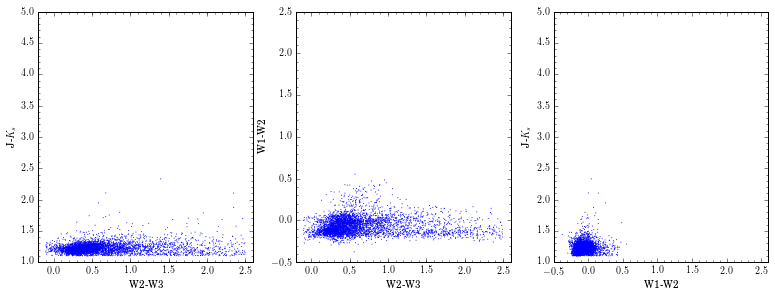

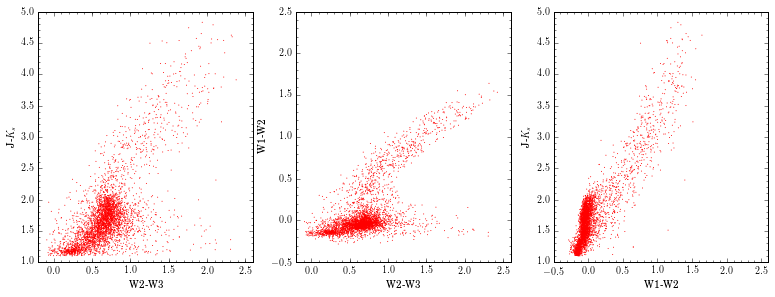

In [31]:
multicolor_plot(ogle_wise[ogle_wise.Spectr == "O-rich"], color="b")
multicolor_plot(ogle_wise[ogle_wise.Spectr == "C-rich"], color="r")


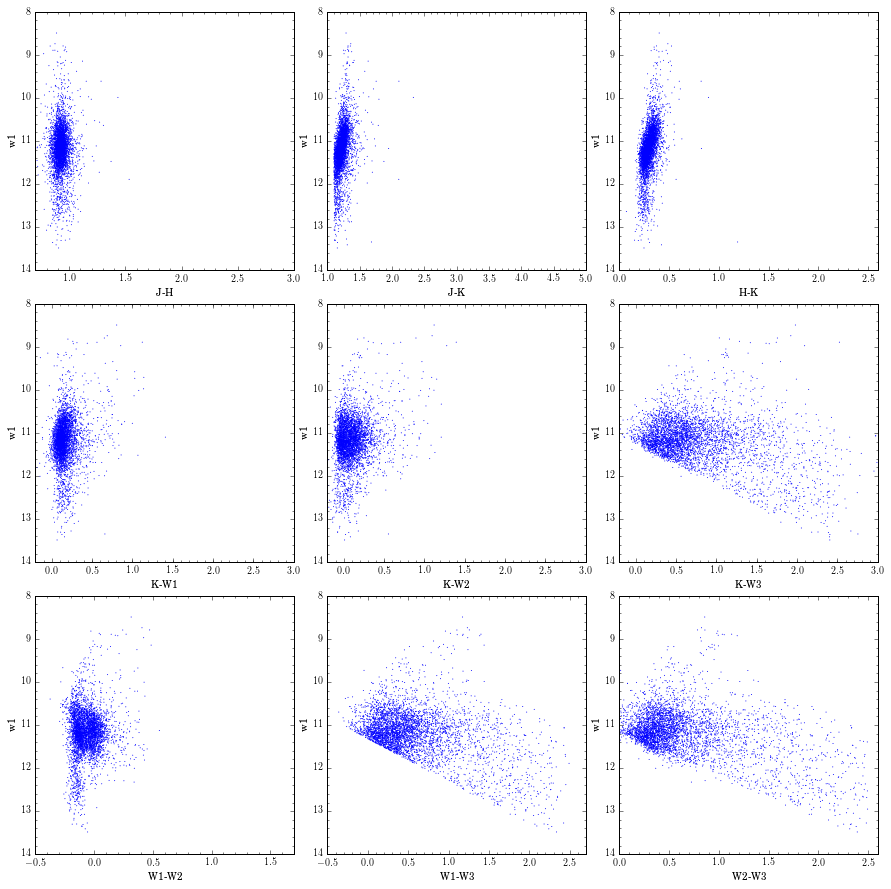

In [75]:
multi_colormag_plot(ogle_wise[ogle_wise.Spectr == "O-rich"], yax="w1",
                   adjust={"top":0.97, "bottom":0.07, "left":0.07, "right":0.97, "hspace":0.13, "wspace":0.13}, color="b")

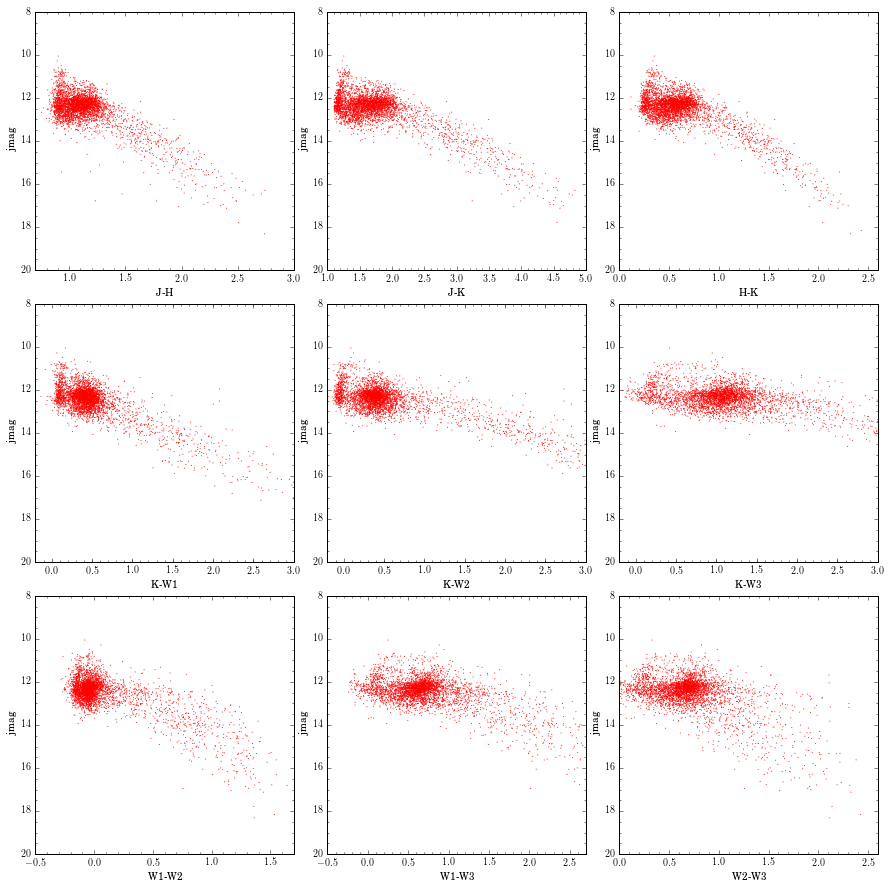

In [50]:
multi_colormag_plot(ogle_wise[ogle_wise.Spectr == "C-rich"], yax="jmag",
                   adjust={"top":0.97, "bottom":0.07, "left":0.07, "right":0.97, "hspace":0.13, "wspace":0.13}, color="r")

Based on color-color arguments, it appears that O-rich and C-rich AGB stars can be separated by:
- $J-K_s = 1.5$
- $W1-W2 = 0.1$

Inside of this box, we have O-rich stars. C-rich stars outside of this box. Let's do this separation on the OGLE sample and figure out completeness/contamination between O/C-rich stars

In [57]:
orich = (ogle_wise.coljk < 1.5) & (ogle_wise.col12 < 0.1)
crich = ~orich

In [74]:
print "O-rich star completeness: {0}%".format(sum(orich & (ogle_wise.Spectr == "O-rich")) / float(sum(ogle_wise.Spectr == "O-rich")) * 100)
print "C-rich star completeness: {0}%".format(sum(crich & (ogle_wise.Spectr == "C-rich")) / float(sum(ogle_wise.Spectr == "C-rich")) * 100)

print "C-rich contamination in O-rich stars: {0}%".format(sum(orich & (ogle_wise.Spectr == "C-rich")) / float(sum(orich)) * 100)
print "O-rich contamination in C-rich stars: {0}%".format(sum(crich & (ogle_wise.Spectr == "O-rich")) / float(sum(crich)) * 100)


O-rich star completeness: 93.5415688116%
C-rich star completeness: 65.8865428644%
C-rich contamination in O-rich stars: 25.1878287002%
O-rich contamination in C-rich stars: 9.59860383944%


5324
4258
